In [30]:
import pandas as pd
import yfinance as yf
import numpy as np
from hmmlearn import hmm
import numpy as np
from scipy.stats import norm
from random import randint



In [31]:
# Define the ticker symbol
tickerSymbol = '^GSPC'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-11-04')
tickerDf['Date'] = tickerDf.index.date

# See your data
print(tickerDf)

                                  Open         High          Low        Close  \
Date                                                                            
2010-01-04 00:00:00-05:00  1116.560059  1133.869995  1116.560059  1132.989990   
2010-01-05 00:00:00-05:00  1132.660034  1136.630005  1129.660034  1136.520020   
2010-01-06 00:00:00-05:00  1135.709961  1139.189941  1133.949951  1137.140015   
2010-01-07 00:00:00-05:00  1136.270020  1142.459961  1131.319946  1141.689941   
2010-01-08 00:00:00-05:00  1140.520020  1145.390015  1136.219971  1144.979980   
...                                ...          ...          ...          ...   
2023-10-30 00:00:00-04:00  4139.390137  4177.470215  4132.939941  4166.819824   
2023-10-31 00:00:00-04:00  4171.330078  4195.549805  4153.120117  4193.799805   
2023-11-01 00:00:00-04:00  4201.270020  4245.640137  4197.740234  4237.859863   
2023-11-02 00:00:00-04:00  4268.259766  4319.720215  4268.259766  4317.779785   
2023-11-03 00:00:00-04:00  4

Monte carlo simulation

The purpose of this code is to generate a new dataset for analysis or machine learning. It does this by creating 100,000 random subsets (or sequences) from the original DataFrame, and for each subset, it calculates several features such as the percentage change for 'Close', 'High', 'Low', and 'Volume' columns, the daily change, and the difference in 'Volume' between the next day and the current day.

This can be useful in a variety of scenarios. For example, if you're trying to predict stock market movements, you might want to create a dataset that captures different sequences of market behavior. By creating many random subsets of your data, you're essentially augmenting your dataset and potentially capturing a wider range of market conditions.

The calculated features could be used as input to a machine learning model. The 'Sequence_ID' can be used to keep track of which rows belong to the same sequence, and 'Close_Date' could be used for time series analysis or to ensure that your training and test sets are split correctly in time. The 'Outcome_Next_Day_Direction' could be used as a target variable for a prediction task.


it pre-calculates some values that don't change inside the loop, such as the length of the DataFrame and the 'Date' and 
'Volume' columns. It then pre-allocates a list of size 100,000 to store the results. The main loop runs 100,000 times. 
For each iteration, it randomly selects a number of rows (`row_quant`) between 10 and 30, and a starting index (`row_start`) between 0 and 
the length of the DataFrame minus `row_quant`. It then creates a subset of the DataFrame (`market_subset`) starting from `row_start` 
and with length `row_quant`. Next, it calculates several features for this subset, such as the percentage change for 'Close', 'High', 'Low', and 
'Volume' columns, the daily change as the percentage difference between 'Close' and 'Open', and the difference between the 'Volume' of the next day 
and the current day (`Outcome_Next_Day_Direction`). These calculated features are then stored in a new DataFrame, which is added to the 
pre-allocated list `new_set`. The 'Sequence_ID' and 'Close_Date' columns in this new DataFrame are filled with the current iteration number 
and the maximum date in the subset, respectively.
Finally, after the loop, all the DataFrames in `new_set` are concatenated into a single DataFrame `result_df`.


In [27]:

# Pre-calculate these values as they do not change inside the loop
ticker_len = len(tickerDf)
dates = tickerDf['Date']
volumes = tickerDf['Volume']

# Pre-allocate a list with the correct size to store the results
new_set = [None] * 100000

for row_set in range(0, 100000):
    if row_set % 2000 == 0:
        print(row_set)
    
    # Choose a random segment of rows
    row_quant = randint(10, 30)
    row_start = randint(0, ticker_len - row_quant)
    market_subset = tickerDf.iloc[row_start:row_start + row_quant]
    
    if row_set % 2000 == 0:
        Close_Date = dates.iloc[row_start + row_quant - 1]
        print(Close_Date)
    
    # Use Pandas vectorized operations for all calculations
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change()
    Volume_Gap = market_subset['Volume'].pct_change()
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = volumes.shift(-1).iloc[row_start:row_start + row_quant] - market_subset['Volume']

    # Store each DataFrame in a pre-allocated list
    new_set[row_set] = pd.DataFrame({
        'Sequence_ID': [row_set] * row_quant,
        'Close_Date': [Close_Date] * row_quant,
        'Close_Gap': Close_Gap,
        'High_Gap': High_Gap,
        'Low_Gap': Low_Gap,
        'Volume_Gap': Volume_Gap,
        'Daily_Change': Daily_Change,
        'Outcome_Next_Day_Direction': Outcome_Next_Day_Direction
    })

# Concatenate all the DataFrames at once outside the loop
result_df = pd.concat(new_set, ignore_index=True)

0
2020-02-07
2000
2018-01-29
4000
2017-02-14
6000
2020-02-24
8000
2011-05-24
10000
2018-08-22
12000
2014-07-03
14000
2017-11-21
16000
2018-03-20
18000
2022-05-25
20000
2017-07-05
22000
2013-01-31
24000
2021-05-19
26000
2010-10-21
28000
2019-07-22
30000
2019-09-19
32000
2014-04-03
34000
2012-11-19
36000
2010-03-23
38000
2015-06-25
40000
2013-06-05
42000
2010-07-30
44000
2012-02-23
46000
2019-03-13
48000
2018-09-07
50000
2010-11-30
52000
2016-03-16
54000
2016-08-25
56000
2023-07-11
58000
2018-03-13
60000
2015-09-30
62000
2018-02-07
64000
2021-07-14
66000
2014-07-24
68000
2016-12-01
70000
2013-08-21
72000
2019-08-20
74000
2013-08-15
76000
2014-05-22
78000
2020-02-25
80000
2021-03-25
82000
2015-03-30
84000
2014-02-13
86000
2015-05-21
88000
2011-11-03
90000
2019-05-07
92000
2017-07-27
94000
2014-02-18
96000
2019-07-30
98000
2023-09-19


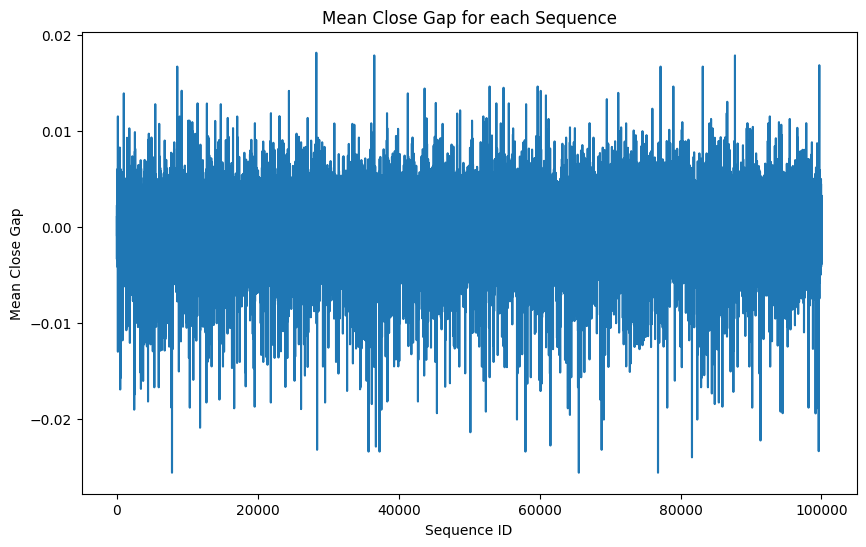

In [29]:
import matplotlib.pyplot as plt

# Group by 'Sequence_ID' and calculate the mean 'Close_Gap'
mean_close_gap = result_df.groupby('Sequence_ID')['Close_Gap'].mean()

# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(mean_close_gap)
plt.title('Mean Close Gap for each Sequence')
plt.xlabel('Sequence ID')
plt.ylabel('Mean Close Gap')
plt.show()

In [28]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.head(20)

(1996698, 8)
(1896682, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
Date,,,,,,,,
2020-01-27 00:00:00-05:00,0,2020-02-07,-0.015731,-0.022300,-0.014332,0.032968,-0.001087,-2.994800e+08
2020-01-28 00:00:00-05:00,0,2020-02-07,0.010054,0.008264,0.005788,-0.078172,0.006417,6.868000e+07
2020-01-29 00:00:00-05:00,0,2020-02-07,-0.000867,0.002340,0.005739,0.019447,-0.004882,1.901000e+08
2020-01-30 00:00:00-05:00,0,2020-02-07,0.003134,-0.002295,-0.008891,0.052802,0.008356,7.393500e+08
2020-01-31 00:00:00-05:00,0,2020-02-07,-0.017706,-0.001089,-0.008672,0.195061,-0.017308,-7.692400e+08
2020-02-03 00:00:00-05:00,0,2020-02-07,0.007255,-0.004232,0.006526,-0.169821,0.004098,2.364400e+08
2020-02-04 00:00:00-05:00,0,2020-02-07,0.014980,0.011773,0.013892,0.062875,0.005176,1.245800e+08
2020-02-05 00:00:00-05:00,0,2020-02-07,0.011251,0.009272,0.010102,0.031169,0.002941,-2.342300e+08
2020-02-06 00:00:00-05:00,0,2020-02-07,0.003326,0.003110,0.006229,-0.056832,0.000257,-1.533300e+08


The provided Python code is performing a data transformation operation on the DataFrame `new_set_df`. It's creating new features by binifying the existing ones into three categories: Low (L), Medium (M), and High (H). This is done using the `pd.qcut()` function, which is a quantile-based discretization function. Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts.

The `pd.qcut()` function is used to divide the data into bins or categories based on the quantiles or distribution of the data. In this case, the data is divided into three quantiles represented by "L", "M", and "H". This is done for the 'Close_Gap', 'High_Gap', 'Low_Gap', 'Volume_Gap', and 'Daily_Change' columns, although 'High_Gap' and 'Low_Gap' are not used in this example.

After this, the DataFrame `new_set_df` is redefined to only include certain columns. A new column 'Event_Pattern' is created by concatenating the string representations of 'Close_Gap_LMH', 'Volume_Gap_LMH', and 'Daily_Change_LMH'. This could be used to identify or classify certain patterns in the data.

Finally, the last 10 rows of the DataFrame are displayed using the `tail()` function. This is often done to verify that the transformations have been applied correctly.

In [5]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

new_set_df.tail(10)


c:\Users\aaron\OneDrive\Desktop\markov\markov\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
Date,,,,,,,
2015-02-19 00:00:00-05:00,99999,2015-03-05,M,M,M,34500000.0,MMM
2015-02-20 00:00:00-05:00,99999,2015-03-05,H,M,H,-187920000.0,HMH
2015-02-23 00:00:00-05:00,99999,2015-03-05,M,L,M,106160000.0,MLM
2015-02-24 00:00:00-05:00,99999,2015-03-05,M,M,M,112500000.0,MMM
2015-02-25 00:00:00-05:00,99999,2015-03-05,M,M,M,96350000.0,MMM
2015-02-26 00:00:00-05:00,99999,2015-03-05,M,M,M,138690000.0,MMM
2015-02-27 00:00:00-05:00,99999,2015-03-05,L,M,L,-137890000.0,LML
2015-03-02 00:00:00-05:00,99999,2015-03-05,H,M,H,-147190000.0,HMH
2015-03-03 00:00:00-05:00,99999,2015-03-05,L,M,L,158810000.0,LML


In [6]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2011-03-11,"{MLM, HMH, HMH, LMM, MHM, HMH, MLM, LHM, HLH, ..."
1,1,2015-09-24,"{MLM, LML, LHL, HLH, MLM, LLL, HHH, LML, HMH, ..."
2,2,2010-02-25,"{LLL, HHH, LLM, HMH, LLM, HMH, HMM, HLH, MMH, ..."
3,3,2020-03-24,"{LHL, LHH, LHL, HLH, LML, LHL, HLH, LLL, HHH, ..."
4,4,2013-06-06,"{MHM, LLL, HMH, HHH, MLM, HHH, HHH, LML, HLH, ..."


In [7]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,-1.176267e+05
std,28867.657797,7.156804e+07
min,0.000000,-6.077675e+08
25%,24999.750000,-2.913889e+07
50%,49999.500000,-6.850000e+05
75%,74999.250000,2.767500e+07
max,99999.000000,6.789725e+08


In [8]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2011-03-11,"{MLM, HMH, HMH, LMM, MHM, HMH, MLM, LHM, HLH, ...",-7.731250e+06
1,1,2015-09-24,"{MLM, LML, LHL, HLH, MLM, LLL, HHH, LML, HMH, ...",7.913889e+06
2,2,2010-02-25,"{LLL, HHH, LLM, HMH, LLM, HMH, HMM, HLH, MMH, ...",3.594250e+07
3,3,2020-03-24,"{LHL, LHH, LHL, HLH, LML, LHL, HLH, LLL, HHH, ...",1.526046e+08
4,4,2013-06-06,"{MHM, LLL, HMH, HHH, MLM, HHH, HHH, LML, HLH, ...",-7.603462e+06


In [12]:
import datetime
compressed_set['Close_Date'] = pd.to_datetime(compressed_set['Close_Date'])
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() - datetime.timedelta(days=90)] 

In [14]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() - datetime.timedelta(days=90)]  

In [15]:
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [16]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))

all moves: 98199
big moves only: 78455


In [17]:
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]


In [18]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))

compressed_set['Outcome_Next_Day_Direction'].head()       


2    1
3    1
5    1
6    0
7    0
Name: Outcome_Next_Day_Direction, dtype: int32

In [23]:
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', expand=True)
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    grid_Df.index.name = None

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [24]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

In [25]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
0.9140161991796211
-1.8524641387188572
outcome: 0
0.8643443248907945
-1.8520182560643796
outcome: 1
1.0596513751866117
-0.09438277425371089
outcome: 0
0.9242200246465585
-1.2782025511678885
outcome: 0
0.8904208432190005
-1.9465630818678101
outcome: 1
0.9296234186576727
-1.6427659325141497
outcome: 1
0.951877962701137
-2.047431817921877
outcome: 1
1.049161091819633
0.9128197112459908
outcome: 0
0.9741490453141519
1.0751213036757659
outcome: 1
1.0393763345583724
1.9214623466710496
outcome: 1
0.9197564517933791
-0.8828968535289271
outcome: 0
0.9176661916349073
-3.360817620829738
outcome: 0
0.874994178702141
-3.79207519069394
outcome: 1
1.0349007330064255
2.0671369512247324
outcome: 0
1.1058983551959938
1.3786308108547771
outcome: 0
0.9120233502007319
0.553412258964334
outcome: 1
1.0960893989552374
1.2522490879039159
outcome: 0
0.97122597016178
0.7508860238845807
outcome: 1
0.8882429545672056
-0.8796413335206554
outcome: 1
0.8208303985812714
-1.2655112151901253
outcome: 1
0.9126

array([[584, 333],
       [504, 380]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 53.53 %
